In [4]:
# Libraries
import pandas as pd
# import geopandas as gpd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [5]:
# Datasets
od = pd.read_csv("Project_dataset.csv")
samhsa = pd.read_csv("uscities_SAMHSA.csv", encoding="utf-8", encoding_errors="ignore")

In [6]:
od.head()

,State FIPS Code,County FIPS Code,State,FIPS Code,"State, County",County,median_household_income_2023,median_household_income_2022,median_household_income_2021,median_household_income_2020,...,opioid_dispensing_rate_2019,opioid_dispensing_rate_2020,opioid_dispensing_rate_2021,opioid_dispensing_rate_2022,opioid_dispensing_rate_2023,drug_od_count_2019,drug_od_count_2020,drug_od_count_2021,drug_od_count_2022,drug_od_count_2023
0,51,720,VA,51720,"VA, Norton city",Norton city,42618,41298,38316,36004,...,569.1,441.0,390.7,374.9,403.9,0,0,0,0,0
1,51,775,VA,51775,"VA, Salem city",Salem city,63701,63676,60740,70349,...,390.2,377.7,396.4,379.3,342.2,0,0,0,0,0
2,51,690,VA,51690,"VA, Martinsville city",Martinsville city,44547,41500,38571,35715,...,374.8,315.7,302.4,234.3,176.5,0,0,0,0,0
3,21,193,KY,21193,"KY, Perry County",Perry County,42519,33585,31522,33712,...,319.2,284.7,280.5,270.0,264.5,7,18,35,22,25
4,42,93,PA,42093,"PA, Montour County",Montour County,73087,76229,68053,63341,...,298.7,260.2,246.4,241.7,230.0,1,1,5,3,4


In [7]:
od.head()
samhsa.head()

,Program Name,DBA,Street,City,State,zip code,Phone,Certification,FullCertification,County,FIPS_county
0,"Serenity Health, LLC",NaN,780 W. Bel Air Ave Suite B,Aberdeen,MD,21001,(410) 273-1030,Certified,9/30/10,Harford,24025
1,ARS of Aberdeen LLC,ARS of Aberdeen LLC,24-26 West Bel Air Ave.,Aberdeen,MD,21001,(410) 272-0230,Certified,3/18/16,Harford,24025
2,"WCHS, Inc.",Grays Harbor Treatment Solutions,516 East 1st St.,Aberdeen,WA,98520,(877) 774-6565,Certified,5/4/20,Grays Harbor,53027
3,Quinault Indian Nation,Quinault Wellness Center,511 W Heron St,Aberdeen,WA,98520,(564) 544-1950,Certified,8/10/23,Grays Harbor,53027
4,"Abilene Absolute Recovery Solutions, OTP","Abilene Absolute Recovery Solutions, OTP [AARS...",429 North Judge Ely Blvd,Abilene,TX,79601,(325) 400-8586,Certified,4/27/22,Taylor,48059


In [8]:
# Group SAMHSA data by county
samhsa_county = samhsa.groupby("FIPS_county").size().reset_index(name="facility_count")
samhsa_county

,FIPS_county,facility_count
0,1009,1
1,1015,1
2,1019,1
3,1021,1
4,1033,1
...,...,...
763,72025,2
764,72053,1
765,72113,1
766,72127,1


In [9]:
merged = od.merge(
    samhsa_county,
    left_on="FIPS Code",  # Column name in the 'od' (left) DataFrame
    right_on="FIPS_county",  # Column name in the 'samhsa_county' (right) DataFrame
    how="left",
)
# removing NA's with 0 in case we calculate %
merged["facility_count"] = merged["facility_count"].fillna(0)
merged = merged.rename(columns={"FIPS_county": "samhsa_fips"})

# merged = merged.drop(columns="FIPS_county")
merged.head()

# Missing values in smahsa_fips just means there is not a clininc in that fips (county)

,State FIPS Code,County FIPS Code,State,FIPS Code,"State, County",County,median_household_income_2023,median_household_income_2022,median_household_income_2021,median_household_income_2020,...,opioid_dispensing_rate_2021,opioid_dispensing_rate_2022,opioid_dispensing_rate_2023,drug_od_count_2019,drug_od_count_2020,drug_od_count_2021,drug_od_count_2022,drug_od_count_2023,samhsa_fips,facility_count
0,51,720,VA,51720,"VA, Norton city",Norton city,42618,41298,38316,36004,...,390.7,374.9,403.9,0,0,0,0,0,NaN,0.0
1,51,775,VA,51775,"VA, Salem city",Salem city,63701,63676,60740,70349,...,396.4,379.3,342.2,0,0,0,0,0,NaN,0.0
2,51,690,VA,51690,"VA, Martinsville city",Martinsville city,44547,41500,38571,35715,...,302.4,234.3,176.5,0,0,0,0,0,NaN,0.0
3,21,193,KY,21193,"KY, Perry County",Perry County,42519,33585,31522,33712,...,280.5,270.0,264.5,7,18,35,22,25,NaN,0.0
4,42,93,PA,42093,"PA, Montour County",Montour County,73087,76229,68053,63341,...,246.4,241.7,230.0,1,1,5,3,4,42093.0,1.0


In [10]:
# Counties with facilities count
count_zero = len(merged[merged["facility_count"] != 0])
count_zero
# 752

752

In [11]:
# Total facilities - lost a few in the merge? Not all counties listed?
count_facilities = merged["facility_count"].sum()
count_facilities
# 2057

np.float64(2057.0)

In [12]:
# Add binary variable for access
merged['has_facility'] = (merged['facility_count'] > 0).astype(int)

# Quick check
merged['has_facility'].value_counts()


has_facility
0    2383
1     752
Name: count, dtype: int64

In [13]:
merged['median_income'] = merged[['median_household_income_2023']].mean(axis=1)
merged['od_rate'] = merged['opioid_dispensing_rate_2023']


In [15]:
print(merged.columns.tolist())


['State FIPS Code', 'County FIPS Code', 'State', 'FIPS Code', 'State, County', 'County', 'median_household_income_2023', 'median_household_income_2022', 'median_household_income_2021', 'median_household_income_2020', 'median_household_income_2019', 'civilian_labor_force_2019', 'employed_2019', 'unemployed_2019', 'unemployment_rate_2019', 'civilian_labor_force_2020', 'employed_2020', 'unemployed_2020', 'unemployment_rate_2020', 'civilian_labor_force_2021', 'employed_2021', 'unemployed_2021', 'unemployment_rate_2021', 'civilian_labor_force_2022', 'employed_2022', 'unemployed_2022', 'unemployment_rate_2022', 'civilian_labor_force_2023', 'employed_2023', 'unemployed_2023', 'unemployment_rate_2023', 'opioid_dispensing_rate_2019 ', 'opioid_dispensing_rate_2020 ', 'opioid_dispensing_rate_2021 ', 'opioid_dispensing_rate_2022', 'opioid_dispensing_rate_2023', 'drug_od_count_2019', 'drug_od_count_2020', 'drug_od_count_2021', 'drug_od_count_2022', 'drug_od_count_2023', 'samhsa_fips', 'facility_cou

In [17]:
analysis_df = merged[['County', 'median_income', 'has_facility', 'od_rate']].dropna()

In [19]:
import statsmodels.api as sm

# Model 1: OD rate ~ income + has_facility
X = analysis_df[['median_income', 'has_facility']]
X = sm.add_constant(X)
y = analysis_df['od_rate']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                od_rate   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     114.9
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           7.74e-49
Time:                        22:08:38   Log-Likelihood:                -14530.
No. Observations:                3081   AIC:                         2.907e+04
Df Residuals:                    3078   BIC:                         2.908e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            52.9038      2.014     26.266

Income is negative → higher income counties have fewer overdoses.
Has_Facility is positive → clinics are placed where overdoses are already higher.
R² = 0.069 → explains about 7% of variation (normal for social data).

In [20]:
analysis_df['income_x_access'] = analysis_df['median_income'] * analysis_df['has_facility']

X2 = analysis_df[['median_income', 'has_facility', 'income_x_access']]
X2 = sm.add_constant(X2)

model2 = sm.OLS(y, X2).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                od_rate   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     79.92
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           8.79e-50
Time:                        22:08:46   Log-Likelihood:                -14526.
No. Observations:                3081   AIC:                         2.906e+04
Df Residuals:                    3077   BIC:                         2.908e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              48.5419      2.464     

The negative interaction term shows that the negative relationship between income and OD rate is weaker when a clinic exists.
Interpretation: Clinics help mitigate overdose risk in low-income counties.
R² increased slightly → model fits better.

<Figure size 600x400 with 0 Axes>

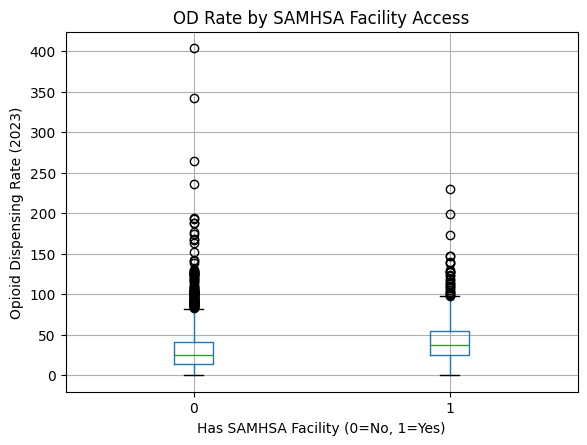

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
analysis_df.boxplot(column='od_rate', by='has_facility')
plt.title('OD Rate by SAMHSA Facility Access')
plt.suptitle('')
plt.xlabel('Has SAMHSA Facility (0=No, 1=Yes)')
plt.ylabel('Opioid Dispensing Rate (2023)')
plt.show()


Expect a positive distance coefficient → farther counties from clinics have higher OD rates.
Strengthens the story: proximity = better access = lower OD.